In [2]:
#import neccessary packages that will be useful for his analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

#### Import the neccesary packages needed for this analysis 

In [6]:
#load train data
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### The data is read and loaded to show a few row of the entire columns in the dataset

In [7]:
#check for general information about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### To check for a general information about the data like; data type, nulls, missing values, number of columns and rows etc. The result shows that there are in total, 891 enteries. Most of them are complete except some columns like; age, cabin and embarked. There are 2 float, 5 integers and 5 object data types.

In [5]:
#check for statistical summary
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### This shows a staistical summary of the numerical columns in the data set. The age column shows an average of 29.699 and a maximum of 80, which means the average age of people that had their details in the dataset is about 30 and the maximum 80. In the fare column there seem to be outliers present due to the extreme difference in the minimum and maximum value, there's also a very big difference between the average value and the maximum value.

In [6]:
train_df.shape

(891, 12)

#### The dataset entails 891 rows and 12 columns 

In [7]:
train_df.shape[0]

891

#### This function calls to print the number of columns in the dataset which is 891

In [39]:
train_df.shape[1]

9

#### This function calls to print the number of columns in the dataset which is 891

In [5]:
#check for missing values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### There are 177 missing values in the Age column, 687 missing values in the Cabin column, and 2 missing values in the Embarked column.

In [8]:
#check for missing values
(train_df.isna().sum()/train_df.shape[0] * 100).sort_values(ascending = False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

#### We check for the total missing values in each column to be shown as their percentage and sorted in an descending order. The Cabin column has about 77% missing values, the Age column has about 19.8% missing values, and the Embarked column has about 0.2% missing values. Columns with missing values must be gotten rid or fixed if they exceed 50%.

In [8]:
#fill in missing values in the age and cabin columns with the median (numeric variables)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

#### There are missing values in the age and cabin columns and then the age column which is a numeric variable is filled with the median. The age column is fixed with the median because it is not normally distributed, hence, the mean will not be a good representative.

In [9]:
#fill in missing values in the Cabin column "unknown" (categorical variables)
train_df['Cabin'].fillna('unknown', inplace= True)

#### The missing values in the cabin column which is a categorical variable is filled with the word "unknown". This is because some of the cells in the Cabin column for some of the passengers are unknown.

In [10]:
#fill in missing values in the Embarked column "unknown" (categorical variables)
train_df['Embarked'].fillna('unknown', inplace= True)

#### The missing values in the Embarked column which is a categorical variable is filled with the word "unknown". This is also because some of the cells in the embarked column for some of the passengers are unknown.

In [17]:
#confirm
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### To confirm if the missing values have been fixed, they have been fixed.

## Exploratory Data Analysis

## Univariate Analysis

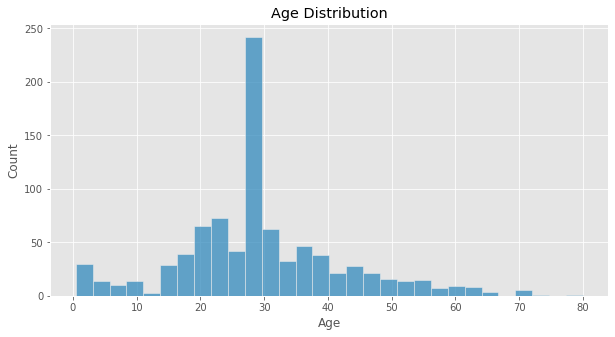

In [17]:
#check the age distribution of passengers
fig = plt.figure(figsize=(10,5))
sns.histplot(train_df.Age)
plt.title("Age Distribution");

#### The graph above shows that the age distribution is right skewed and the age of majority of passengers fall between 20 years old to 40 years old. The graph also indicates a sharp rise before 30, this might mean that most of the passengers that boarded the ship are about 26-30 years.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


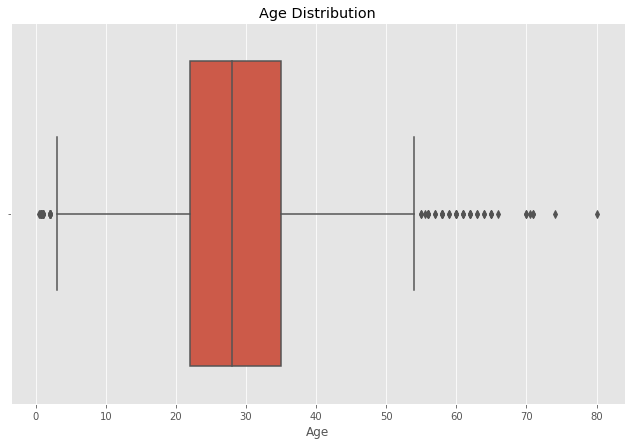

In [20]:
fig = plt.figure(figsize = (11, 7))
sns.boxplot(train_df.Age)
plt.title("Age Distribution");

#### The boxplot shows the age distribution of the passengers in the dataset, the data points outside the box signifies the presence of outliers, which signifies the presence of extreme values. The plot shows that the mean value is about 26-28

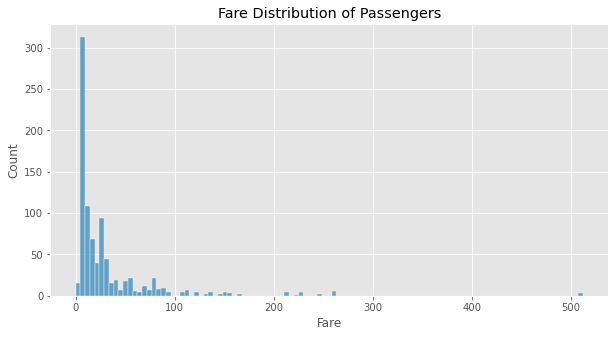

In [26]:
#check the fare distribution of passengers
fig = plt.figure(figsize=(10,5))
sns.histplot(train_df.Fare)
plt.title('Fare Distribution of Passengers');

#### The graph above shows the distribution of fare passengers paid and it is very much right skewed which means that the mean is greater than the median, hence this shows the presense of extreme values and outliers which can be seen from about a 100 dollars fare down to >500 dollars fare. It shows that most passengers paid less from about $0-$30, compared to other passengers that paid from about fifty dollars to close to 300 dollars. This might be an indicator that most people who paid the highest amount are found in the first class which has less passengers compared to the other classes. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


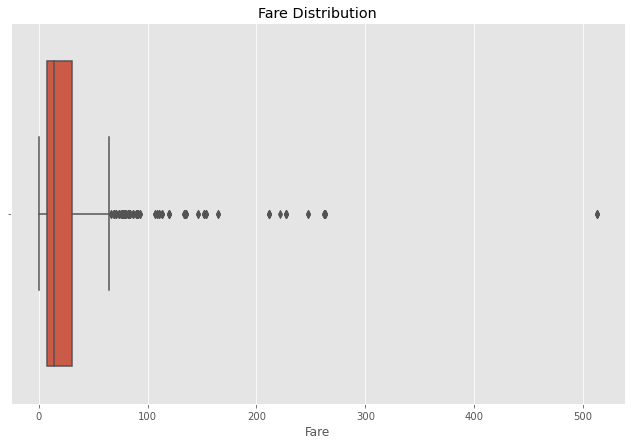

In [25]:
fig = plt.figure(figsize = (11, 7))
sns.boxplot(train_df.Fare)
plt.title("Fare Distribution");

#### The boxplot above shows the fare range of passengers and the presence of outliers. Majority of the value in the fare column starts from zero till about thirty and we can also see some data points till about 100, but there are some extreme data points as seen in the plot in between 200 and 300 and also around 500. The plot above also indicates that majority of passengers paid a fare between 0-40 dollars. Most passengers paid a fare above the median value.

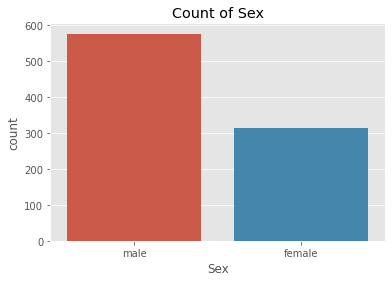

In [27]:
#check the count of sex amongst passengers
sns.countplot(x= 'Sex', data=train_df)
plt.title('Count of Sex');

In [35]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### The bar plot above shows that the male gender was the most of passengers and is almost double the number of the female gender amongst the passengers. The value count for male and female passengers are 577 and 314 respectively.

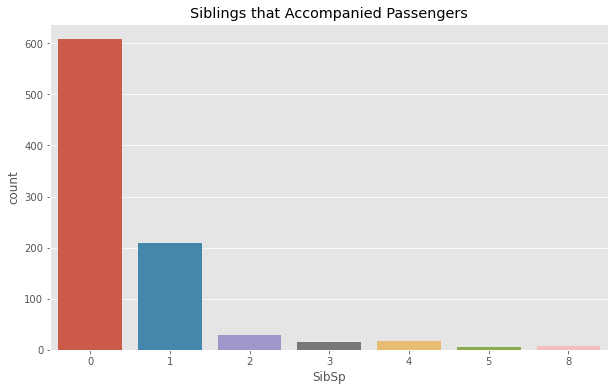

In [126]:
#check the distribution of passengers' siblings that accompanied them
fig = plt.figure(figsize=(10,6))
sns.countplot(x= 'SibSp', data=train_df)
plt.title('Siblings that Accompanied Passengers');

#### The plot above shows the number of siblings that accompanied each passenger. Most passengers came alone and just a few came along with their siblings. Some passengers on board that came with their siblings, came with 1 each. The number of passengers that came with 2 or more siblings are not so significant. 

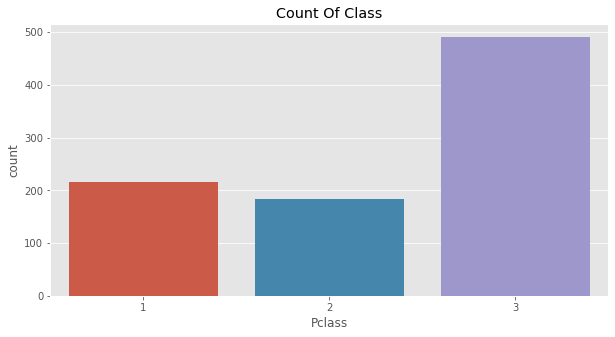

In [32]:
#check the count of class amongst passengers
fig = plt.figure(figsize=(10,5))
sns.countplot(x= 'Pclass', data=train_df)
plt.title('Count Of Class');

#### The graph above shows the count of class that the passengers took. Most passengers are found in the lower class, it is almost double of the upper and middle class. However, the upper class seemed to have a little more passengers than the middle class.  This might be because most people could not afford the price of the upper and middle class.

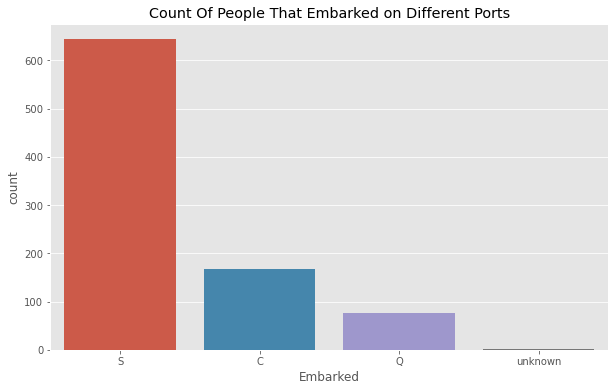

In [127]:
#check the count of passengers that embarked from different ports
fig = plt.figure(figsize=(10,6))
sns.countplot(x= 'Embarked', data=train_df)
plt.title('Count Of People That Embarked on Different Ports');

#### The plot above shows the count of passengers that embarked from different ports. Most passengers embarked from the Southampton port, less than half of the passengers embarked from the Cherbourg port and very few people embarked from Queenstown port. The ports where very tiny percentage of passengers embarked was not recorded

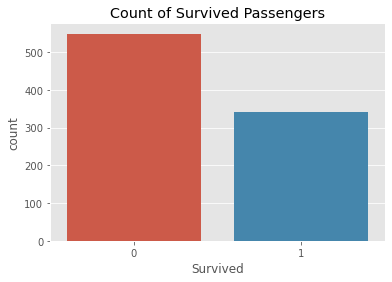

In [124]:
#check the count of survived  passengers
sns.countplot(x= 'Survived', data=train_df)
plt.title('Count of Survived Passengers');

In [36]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### The plot above shows the count of survived passengers. Most people did not survive, while a few people did.  The value count for  passengers that survived and did not survive are 549 and 342 respectively.

## Bivariate Analysis

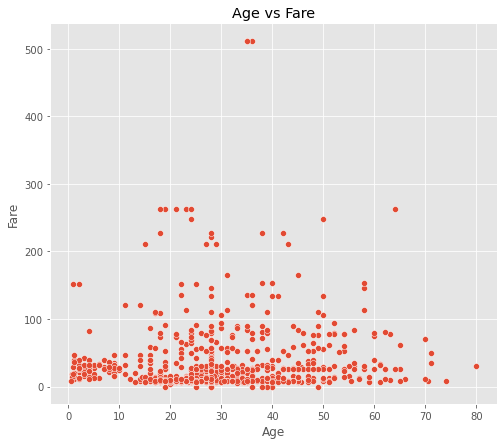

In [122]:
#use a scatter plot to check for correlation between age and fare

def plot_scatter(a,b,c):
    fig = plt.figure(figsize=(8, 7))
    sns.scatterplot(x=a, y=b, data=c)
    plt.title('Age vs Fare')
    plt.xlabel('Age')
    plt.ylabel('Fare')
plot_scatter('Age', 'Fare', train_df)

#### A defined function for scatter plot is used, to avoid writing repeatitive codes in constructing other scatter plots. In the above graph, a scatter plot is used to check for the correlation between age and fare. The diagram insinuates that there is not exactly a correlation between the passengers' fare and age, as the fare increases, the ages still remains within the same range, so we cannot say there is an exact correlation between the fare paid by passengers and their age.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


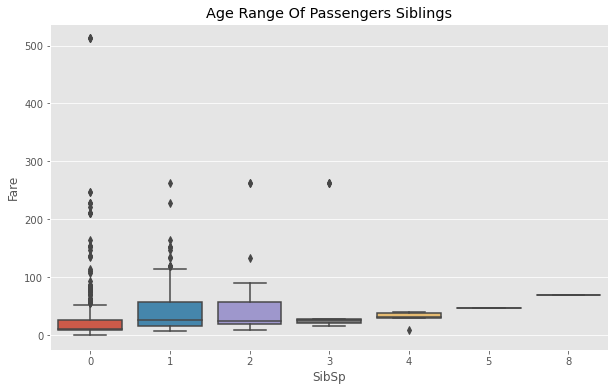

In [117]:
#boxplot showing siblings age
fig = plt.figure(figsize=(10,6))
sns.boxplot(train_df.SibSp, train_df.Fare)
plt.title('Age Range Of Passengers Siblings');

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


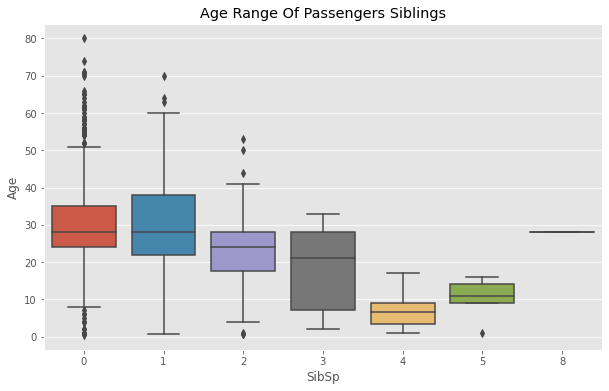

In [116]:
#boxplot showing siblings age
fig = plt.figure(figsize=(10,6))
sns.boxplot(train_df.SibSp, train_df.Age)
plt.title('Age Range Of Passengers Siblings');

#### The boxplot above shows the age range of passengers' siblings.  Most people that came on board without any sibling, have their average age to be about 28 years of age. Those who came with one sibling have their average age from about 30-38. Those who came with two siblings have their average age from about 25-28. Those who came with three siblings have their average age from about 22-38. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


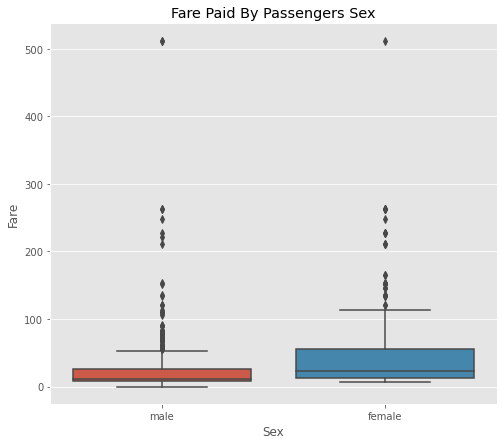

In [74]:
#boxplot showing fare range each sex paid
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Sex, train_df.Fare)
plt.title('Fare Paid By Passengers Sex');

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


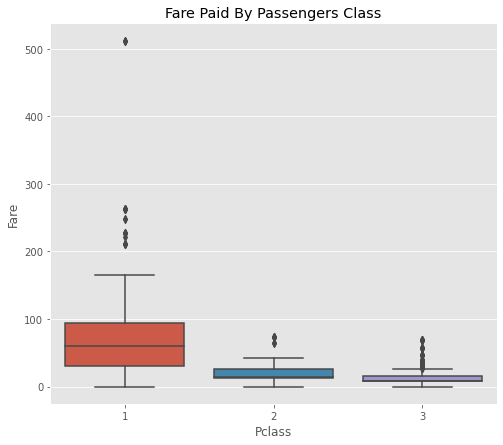

In [75]:
#boxplot showing fare range by passengers' class
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Pclass, train_df.Fare)
plt.title('Fare Paid By Passengers Class');

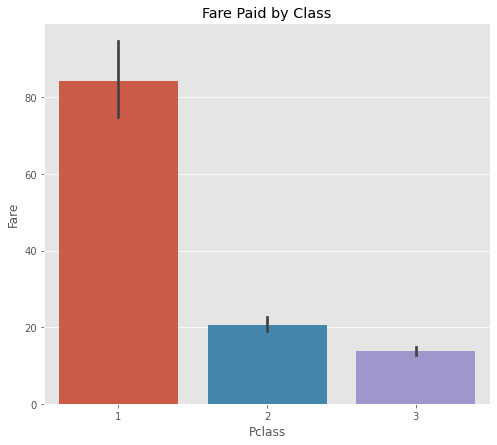

In [115]:
#we visualise the ratio of fare paid by class
fig = plt.figure(figsize=(8,7))
sns.barplot(x='Pclass', y = 'Fare', data =train_df)
plt.title('Fare Paid by Class');

#### The plot above shows the relationship between the fare passengers paid and their class. There seem to be an increase in the fare as the class increases. The upper class has an indicator of a higher fare than the middle and lower class. The fare paid by passengers at the upper class is about 4 times the price paid in the middle and lower classes.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


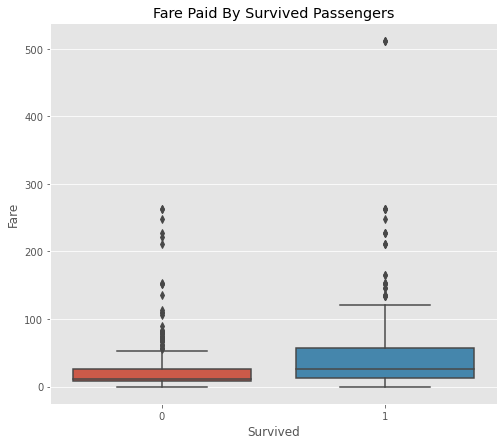

In [77]:
#boxplot showing fare range by passengers' that survived
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Survived, train_df.Fare)
plt.title('Fare Paid By Survived Passengers');

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


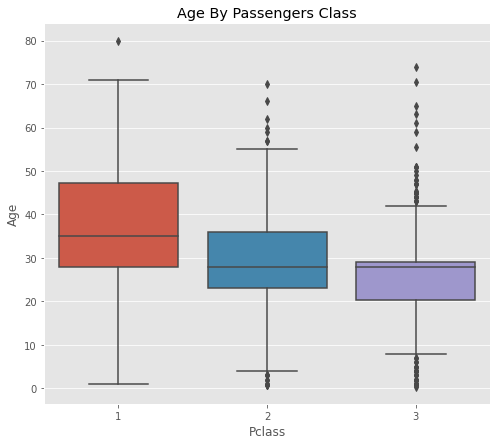

In [79]:
#boxplot showing age by passenger's class
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Pclass, train_df.Age)
plt.title('Age By Passengers Class');

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


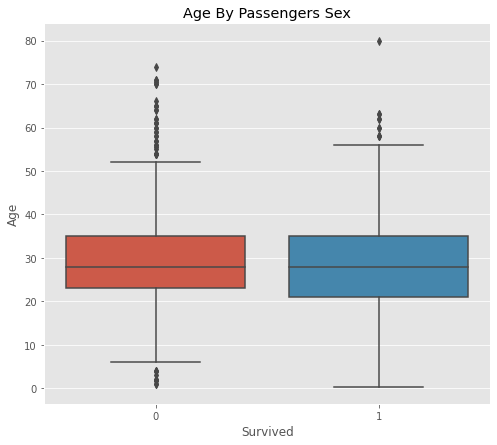

In [80]:
#boxplot showing age range by passenger's survival
fig = plt.figure(figsize=(8,7))
sns.boxplot(train_df.Survived, train_df.Age)
plt.title('Age By Passengers Sex');

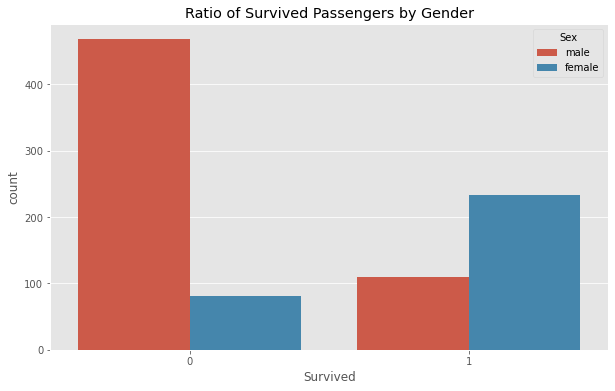

In [106]:
#we visualise the count of poeple that survived
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Survived', hue = 'Sex', data =train_df)
plt.title('Ratio of Survived Passengers by Gender');

#### The graph above shows that most passengers did not survive. It shows that most of the passengers that did not survive are men, also the ones that survived were men. This might be because most of the passengers on board were men.

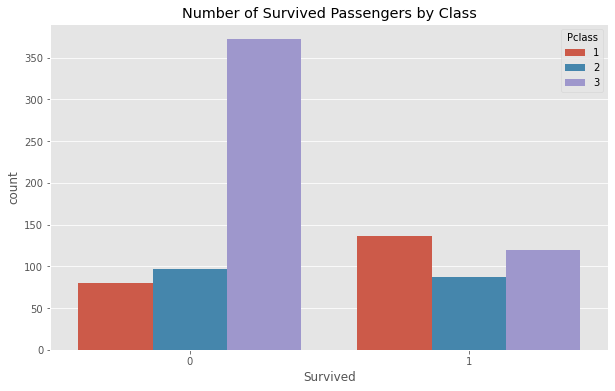

In [105]:
#we visualise the number of people that survived and their class
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue= 'Pclass',data=train_df)
plt.title('Number of Survived Passengers by Class');

#### The graph above shows that most passengers that did not survive were in the lower class of the ship, this might mean that there was less protective or survival equipment in the lower class section of the ship or the rescue team prioritised the people on the first class

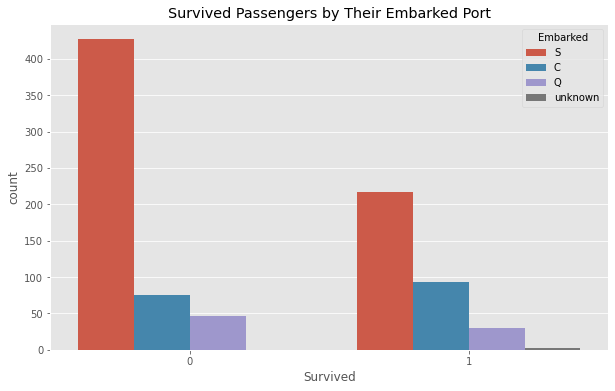

In [104]:
#we visualise the number of poeple that survived by the port that they embarked from
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue= 'Embarked',data=train_df)
plt.title('Survived Passengers by Their Embarked Port');

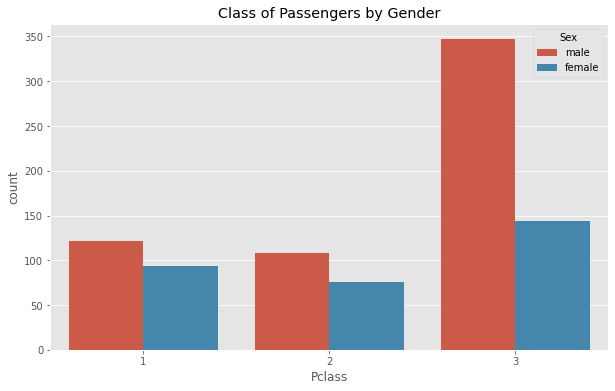

In [103]:
#we visualise the class of passengers by their gender
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue = 'Sex', data =train_df)
plt.title('Class of Passengers by Gender');

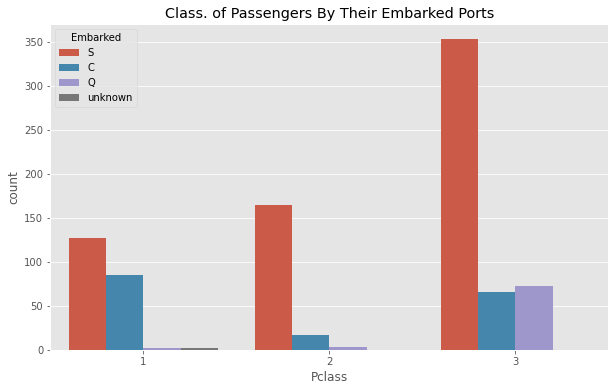

In [107]:
#we visualise the class of passenger's by the port they embarked from
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue = 'Embarked', data =train_df)
plt.title('Class. of Passengers By Their Embarked Ports');

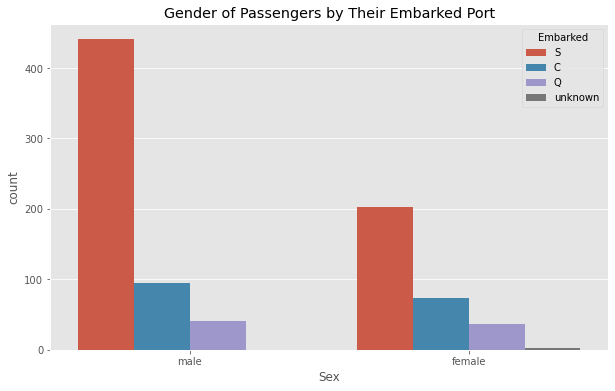

In [108]:
#we visualise the number of poeple that survived by the port that they embarked from
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue= 'Embarked',data=train_df)
plt.title('Gender of Passengers by Their Embarked Port');

#### The plot above shows the gender of passengers by the different ports that they embarked from. Overlly, most male and female embarked from the Southampton port, then the other few passengers embarked from Cherbourg port and from Queenstown. The ship probably was not filled to capacity at its initial boarding and decided to stop over to pick other passengers at the other ports.

## Multivariate Analysis

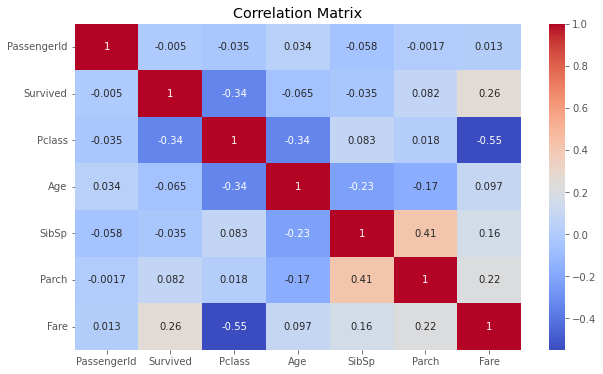

In [112]:
#to find correlation between attributes
fig = plt.figure(figsize = (10,6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix');

#### There seem to be little or no significance in the correlation of the variables. The colors of each box represents how correlated the variables are with each other. Boxes that approach red shows more correlations and the ones that approach blue shows how less correlated the variables are. The highest corellated variables in the graph is the parch and passengers siblings, which isn't significant becausethey are just 41% (0.41) correlated which is not even up to 50%. The least corellated variables is the Fare and Passengers' class variables with a -0.55 correlation point.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


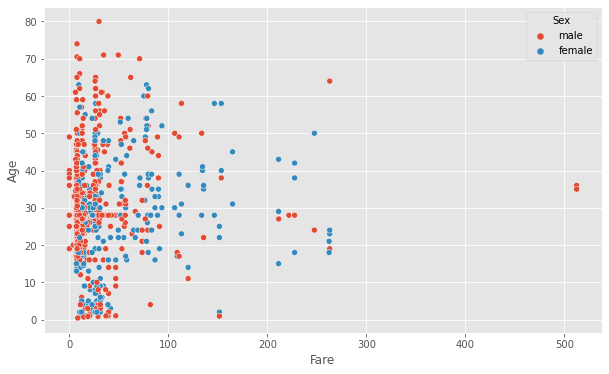

In [109]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(train_df.Fare, train_df.Age, hue=train_df.Sex);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


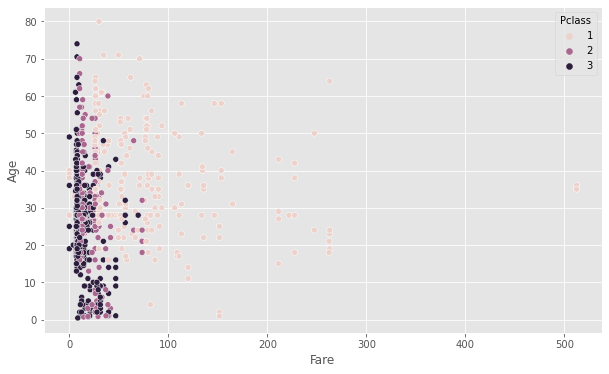

In [110]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(train_df.Fare, train_df.Age, hue=train_df.Pclass);

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


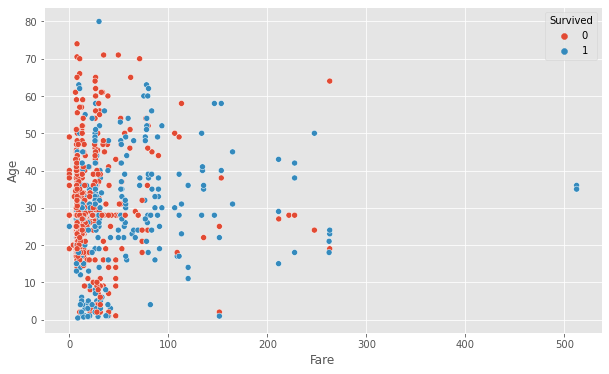

In [111]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(train_df.Fare, train_df.Age, hue=train_df.Survived);